### Importação dos dados



In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [15]:
# Concatenação e cálculo do faturamento
dados_completos = pd.concat(
    [loja, loja2, loja3, loja4],
    keys=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
)
faturamento = dados_completos.groupby(level=0)['Preço'].sum().reset_index()
faturamento.columns = ['Loja', 'Faturamento Total']

# Formatação Markdown
print("Faturamento por loja:")
print(tabulate(faturamento, headers='keys', tablefmt='pipe', showindex=False, floatfmt=".2f"))

Faturamento por loja:
| Loja   |   Faturamento Total |
|:-------|--------------------:|
| Loja 1 |          1534509.12 |
| Loja 2 |          1488459.06 |
| Loja 3 |          1464025.03 |
| Loja 4 |          1384497.58 |


# 2. Vendas por Categoria


In [16]:
vendas_por_categoria = dados_completos.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
print(vendas_por_categoria)


Categoria do Produto
eletronicos              2214099.72
eletrodomesticos         1766337.03
moveis                   1010214.00
instrumentos musicais     465029.67
esporte e lazer           190635.39
brinquedos                 98140.86
utilidades domesticas      76773.38
livros                     50260.74
Name: Preço, dtype: float64


# 3. Média de Avaliação das Lojas

In [17]:
media_avaliacao = dados_completos.groupby(level=0)['Avaliação da compra'].mean().round(2)
print(media_avaliacao)

Loja 1    3.98
Loja 2    4.04
Loja 3    4.05
Loja 4    4.00
Name: Avaliação da compra, dtype: float64


# 4. Produtos Mais e Menos Vendidos

In [18]:
# Cálculo dos produtos mais e menos vendidos
produtos_mais_vendidos = dados_completos['Produto'].value_counts().head(10).reset_index()
produtos_mais_vendidos.columns = ['Produto', 'Quantidade Vendida']

produtos_menos_vendidos = dados_completos['Produto'].value_counts().tail(10).reset_index()
produtos_menos_vendidos.columns = ['Produto', 'Quantidade Vendida']

# Formatação com tabulate
print("TOP 10 Produtos Mais Vendidos:")
print(tabulate(produtos_mais_vendidos, headers='keys', tablefmt='pipe', showindex=False))

print("\nTOP 10 Produtos Menos Vendidos:")
print(tabulate(produtos_menos_vendidos, headers='keys', tablefmt='pipe', showindex=False))

TOP 10 Produtos Mais Vendidos:
| Produto                  |   Quantidade Vendida |
|:-------------------------|---------------------:|
| Cômoda                   |                  210 |
| Carrinho controle remoto |                  206 |
| Micro-ondas              |                  206 |
| Bateria                  |                  203 |
| Cama king                |                  201 |
| Secadora de roupas       |                  200 |
| Modelagem preditiva      |                  200 |
| Jogo de panelas          |                  200 |
| Cama box                 |                  199 |
| Blocos de montar         |                  199 |

TOP 10 Produtos Menos Vendidos:
| Produto                     |   Quantidade Vendida |
|:----------------------------|---------------------:|
| Panela de pressão           |                  172 |
| Smartwatch                  |                  172 |
| Jogo de copos               |                  169 |
| Poltrona                    |      

# 5. Frete Médio por Loja

In [19]:
frete_medio = dados_completos.groupby(level=0)['Frete'].mean().round(2)
print(frete_medio)

Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
Name: Frete, dtype: float64


# 6. Graficos

* Faturamento por Loja





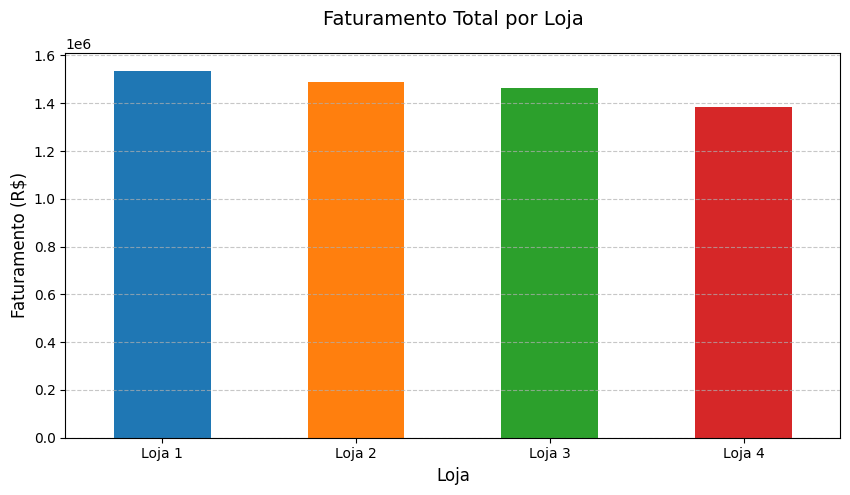

In [21]:
# Dados do faturamento (já calculados anteriormente)
faturamento = dados_completos.groupby(level=0)['Preço'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
faturamento.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Faturamento Total por Loja', fontsize=14, pad=20)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Distribuição de Categorias de Produtos

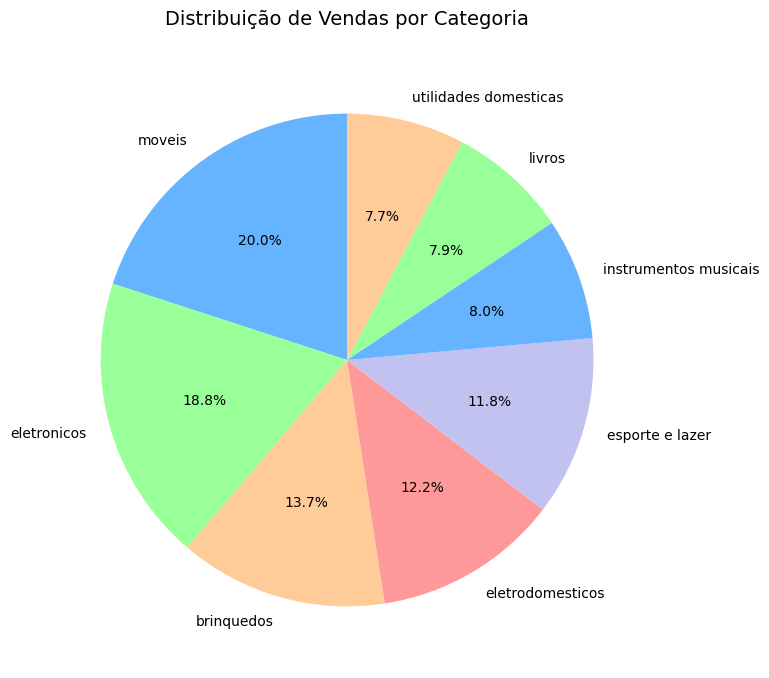

In [23]:
# Agrupar por categoria
vendas_categoria = dados_completos['Categoria do Produto'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
vendas_categoria.plot(kind='pie', autopct='%1.1f%%', startangle=90,
                      colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#c2c2f0'])
plt.title('Distribuição de Vendas por Categoria', fontsize=14, pad=20)
plt.ylabel('')  # Remove label do eixo Y
plt.show()

* Avaliação das Lojas

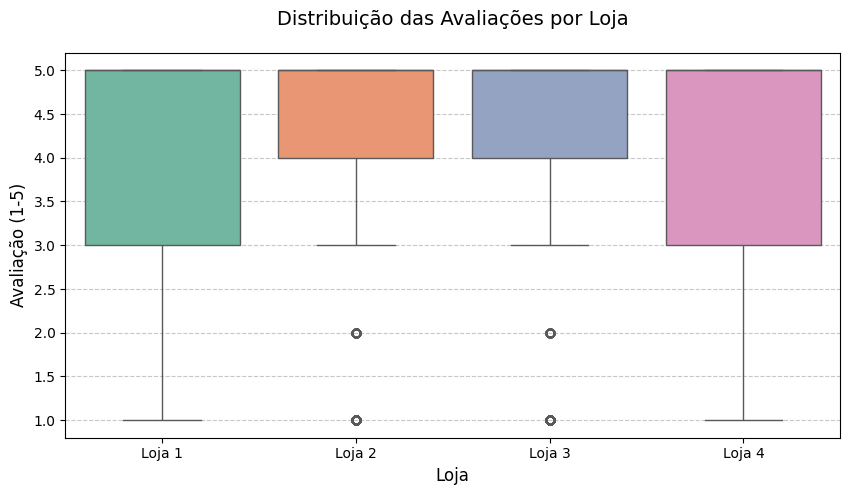

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=dados_completos.reset_index(),
    x='level_0',
    y='Avaliação da compra',
    hue='level_0',  # Adicionamos hue igual a x
    palette='Set2',
    legend=False  # Removemos a legenda redundante
)
plt.title('Distribuição das Avaliações por Loja', fontsize=14, pad=20)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Avaliação (1-5)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Gráfico de Dispersão (Preço vs. Frete)

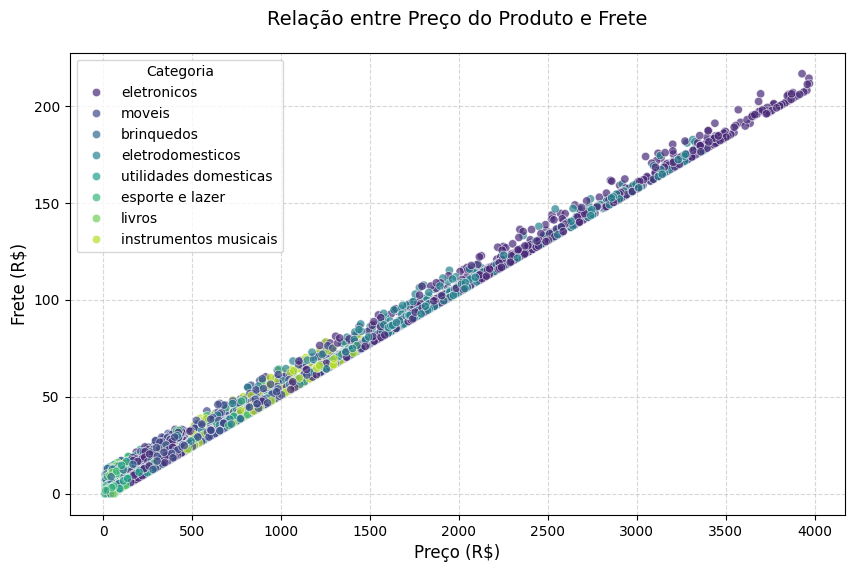

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados_completos, x='Preço', y='Frete', hue='Categoria do Produto',
                palette='viridis', alpha=0.7)
plt.title('Relação entre Preço do Produto e Frete', fontsize=14, pad=20)
plt.xlabel('Preço (R$)', fontsize=12)
plt.ylabel('Frete (R$)', fontsize=12)
plt.legend(title='Categoria')
plt.grid(linestyle='--', alpha=0.5)
plt.show()